In [277]:
from __future__ import print_function

import pylab as pl
import seaborn
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
import scipy
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(303)
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1.0 Normal Distribution 

In [278]:
#distributions = ['gaus', 'pois', 'binomial', 'chisq', 'lnorm']
distributions = ['normal']

In [279]:
mymean = 1000

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


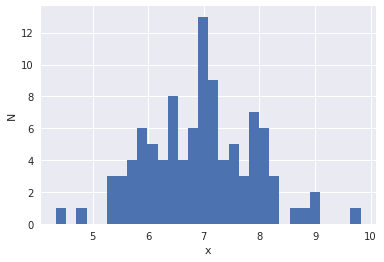

In [280]:
md = {}
md['normal'] = np.random.normal(log(mymean),1,size=100)
pl.hist(md['normal'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [281]:
np.random.seed(303)
samplesize = np.random.randint(11,2000,100)
#to get 100 random arrays
samplesize

array([ 582, 1415,  541, 1164,  687, 1056, 1015, 1392, 1024, 1841, 1397,
        211,  381, 1577, 1558,  380,  191,  986, 1253,   60,  778,  943,
       1002, 1009, 1201, 1770, 1791,  956,  637, 1007,  487,  446,  116,
       1377,  723,  435,  127,  223, 1000,  910, 1065,  625,  854,   49,
       1760, 1663, 1245,  866,  711, 1224, 1393,  810,  357,  697, 1195,
       1899,  806, 1927,  717, 1932,  715,  854, 1062, 1795,  598, 1962,
        853, 1437,  677, 1914, 1166,  358,  866,  385, 1884, 1192, 1041,
        676, 1646,   44,  523,  997, 1307,  638,  110, 1890,  881, 1684,
        441, 1111, 1593,  214,  280, 1350, 1016,  588,  499,  649,  422,
       1236])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


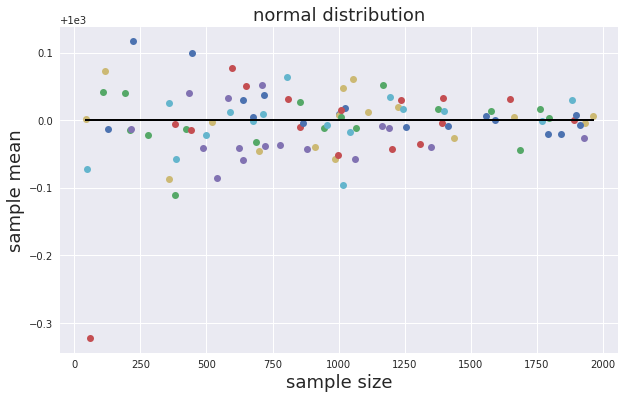

In [282]:
np.random.seed(303)
md = {}
md['normal']={}
#put a key in the dictionary

for n in samplesize:
    md['normal'][n] = np.random.normal(mymean,1,size=n)
#sample size is n 
    
md['normal']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()

        axgaus_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('normal distribution', fontsize=18)
        axgaus_mu_n.plot([min(samplesize), max(samplesize)],[mymean, mymean], 'k')
        # k is for black line. straightline 

## Figure 1a: Scatter plot of sample mean against sample size in a normal distribution. It is observed that as the sample size increases, the sample mean appear to tend towards the population mean as established by the Central Limit Theorem. 

<function matplotlib.pyplot.hist>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


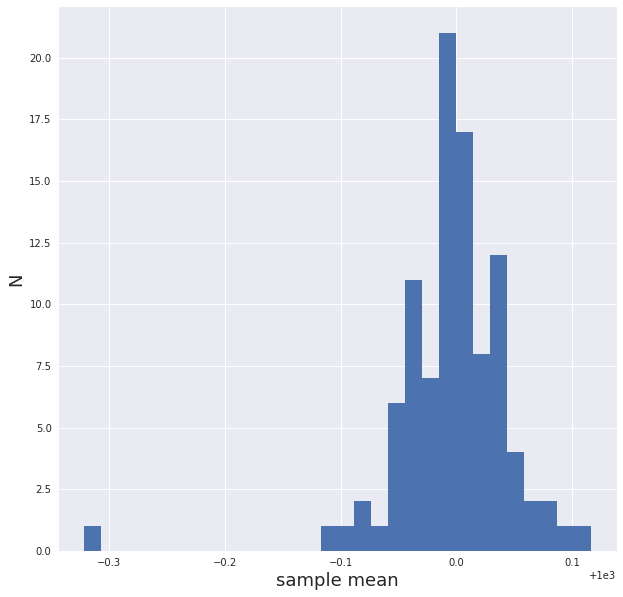

In [283]:
normalmeans = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(normalmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.hist

## Figure 1b: Histogram showing the distribution of sample means in a normal distribution.  

## 2.0 Poisson Distribution

In [284]:
np.random.seed(303)
    
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [285]:
distributions = ['pois']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


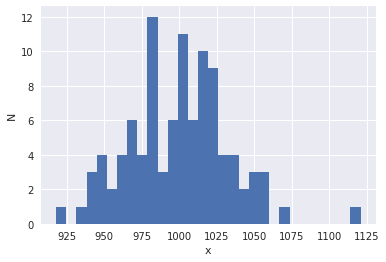

In [286]:
md['poisson']= {}

md['poisson'] = np.random.poisson(1000, size=100)

pl.hist(md['poisson'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


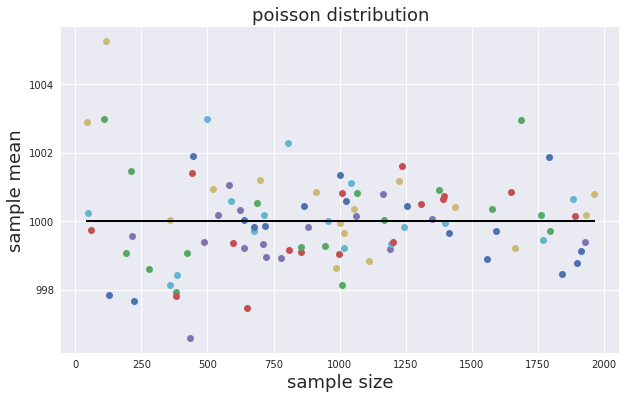

In [287]:
np.random.seed(303)
md['poisson']= {}

for n in samplesize:
    md['poisson'][n] = np.random.poisson(mymean,size=n)
    
md['poisson']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()

        axgaus_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('poisson distribution', fontsize=18)
        axgaus_mu_n.plot([min(samplesize), max(samplesize)],[mymean, mymean], 'k')


## Figure 2a: Scatter plot of sample mean against sample size in a poisson distribution. It is observed that as the sample size increases, the sample mean appear to tend towards the population mean as established by the Central Limit Theorem. 

<function matplotlib.pyplot.hist>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


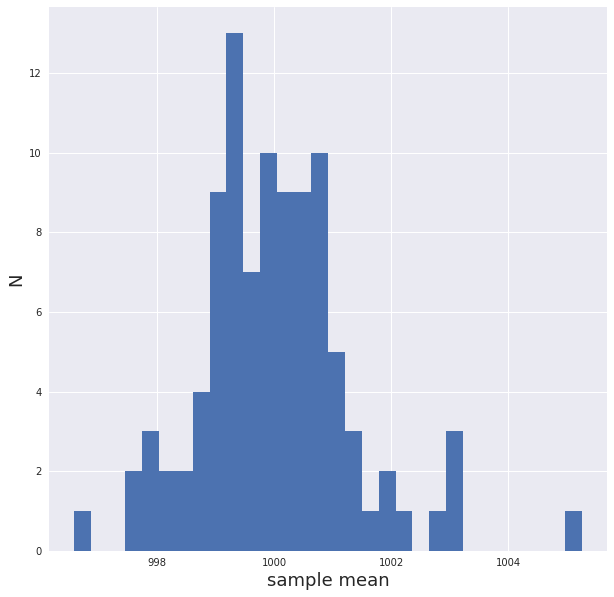

In [288]:
poissonmeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(poissonmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
plt.hist

## Figure 2b: Histogram showing the distribution of sample means in a poisson distribution.  

## 3.0 Binomial Distribution

In [289]:
np.random.seed(303)
    
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [290]:
distributions = ['binomial']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


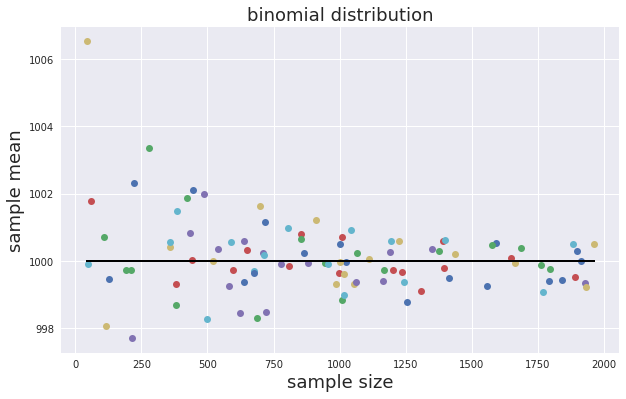

In [291]:
np.random.seed(303)
samplesize = np.random.randint(11,2000,100)
md['binomial'] = {}
for n in samplesize:
    md['binomial'][n] = np.random.binomial((1000/0.5),0.5,n)
    
#letting p= 0.5
    
md['binomial']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()

        axgaus_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('binomial distribution', fontsize=18)
        axgaus_mu_n.plot([min(samplesize), max(samplesize)],[mymean, mymean], 'k')


## Figure 3a: Scatter plot of sample mean against sample size in a binomial distribution. It is observed that as the sample size increases, the sample mean appear to tend towards the population mean as established by the Central Limit Theorem. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


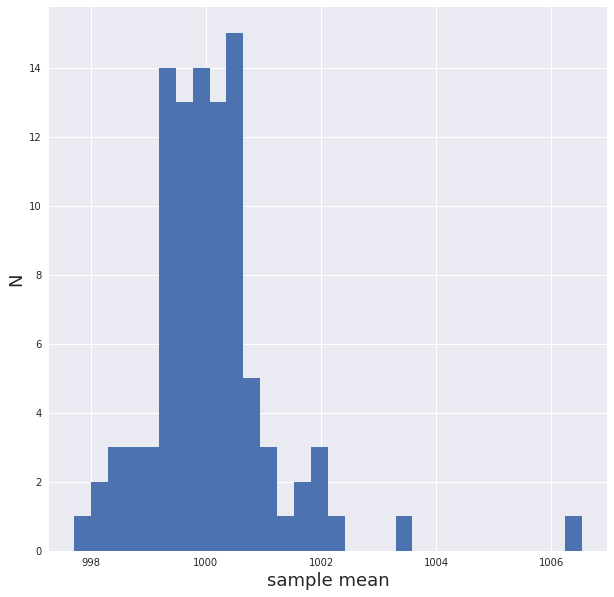

In [292]:
binomialmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(binomialmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)


## Figure 3b: Histogram showing the distribution of sample means in a binomial distribution.

## 4.0 Chisquare

In [293]:
distributions = ['chisq']

In [294]:
import numpy as np
np.random.seed(303)


Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


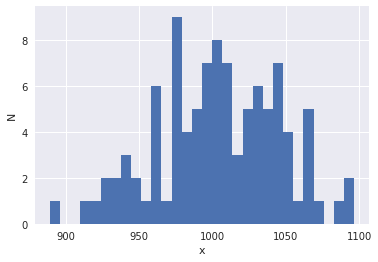

In [295]:
md = {}
df = mymean
md['chisq'] = np.random.chisquare(df, size=100)

pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


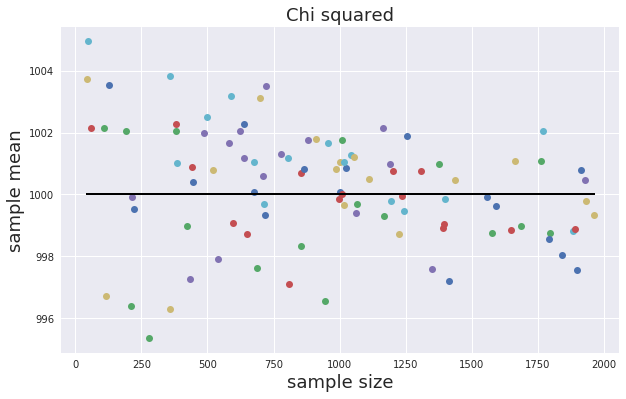

In [296]:
np.random.seed(303)
md['chisq'] = {} 

for n in samplesize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
      
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [df, df], 'k')

## Figure 4a: Scatter plot of sample mean against sample size in a chisquared distribution. It is observed that as the sample size increases, the sample mean appear to tend towards the population mean as established by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


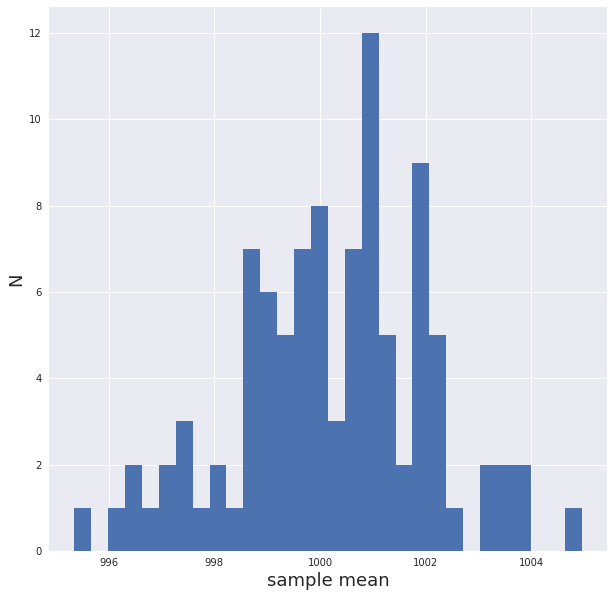

In [297]:
chimeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(chimeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 4b: Histogram showing the distribution of sample means in a chi-squared distribution.

## 5.0 Log Normal

In [298]:
distributions = ['lognormal']

In [299]:
import numpy as np
np.random.seed(303)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


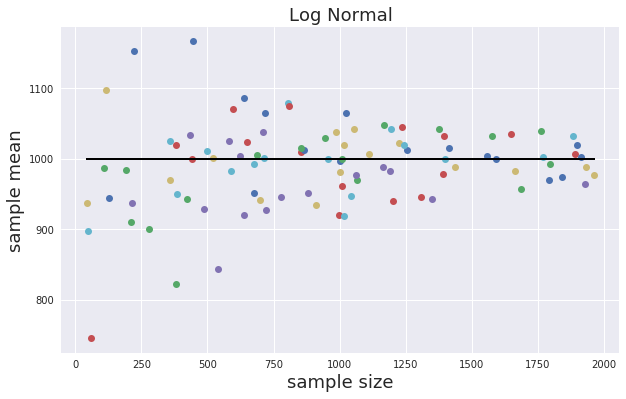

In [300]:
mean_lognormal = 6.40775
#y=lnX. if X is log normally distributed, y is log normall distributed. underlying normal distribution (y)=lnX. when you log the distribution you get a normal distribution
md = {}
df = mymean

np.random.seed(303)
md['lognormal'] = {} 

for n in samplesize:
    md['lognormal'][n] = np.random.lognormal(mean_lognormal,1,n)
    
md['lognormal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lognormal']:
    if not type(nn) == str:
        md['lognormal']['means'][nn] = md['lognormal'][nn].mean()
      
        axchisq_mu_n.plot(nn, md['lognormal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Log Normal', fontsize=18)
        axchisq_mu_n.plot([min(samplesize), max(samplesize)], [1000, 1000], 'k')

## Figure 5a: Scatter plot of sample mean against sample size in a Log Normal distribution. It is observed that as the sample size increases, the sample mean appear to tend towards the population mean as established by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


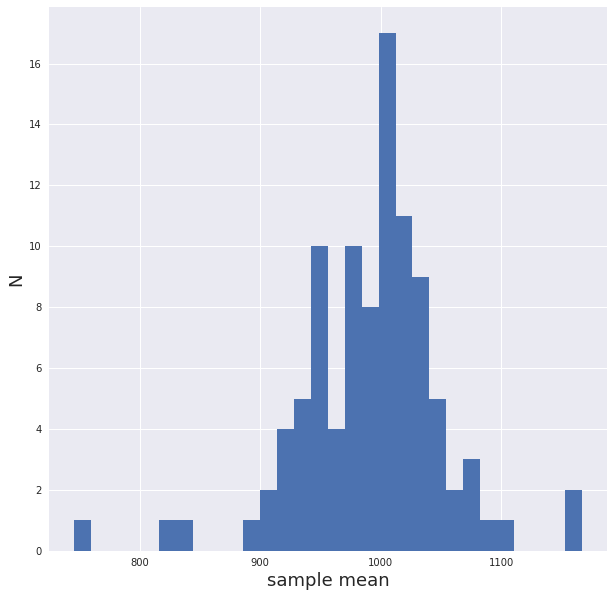

In [301]:
logmeans = list(md['lognormal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(logmeans, bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)




In [302]:
## Figure 5b: Histogram showing the distribution of sample means in a Log Normal distribution.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


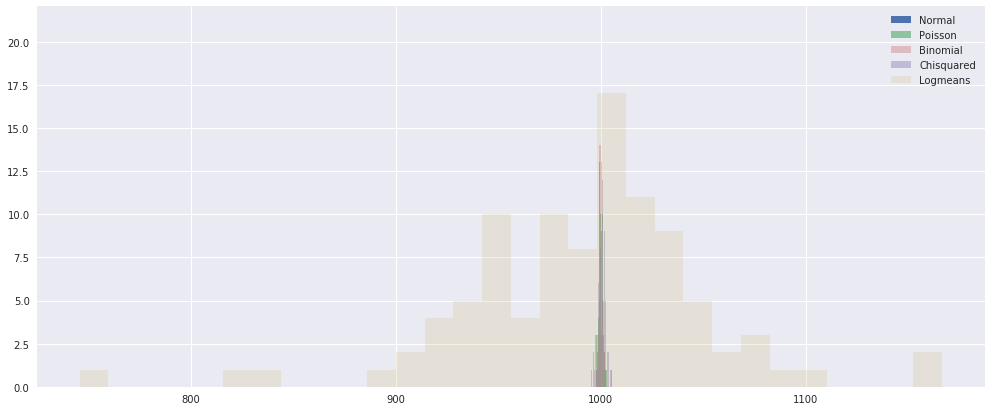

In [303]:
pl.figure(figsize=(17,7))

pl.hist(normalmeans,bins=30, alpha=1, label='Normal')
pl.hist(poissonmeans,bins=30, alpha=0.6, label='Poisson')
pl.hist(binomialmeans,bins=30, alpha=0.3, label='Binomial')
pl.hist(chimeans,bins=30, alpha=0.4, label='Chisquared')
pl.hist(logmeans,bins=30, alpha=0.2, label='Logmeans')

pl.legend()

## Figure 6: Histogram showing the distribution of sample means in 5 different distributions of Normal, Poisson, Binomial, Chisquared and Logmeans distribution.

## Extra Credit: Fitting a gaussian to the distribution of means

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


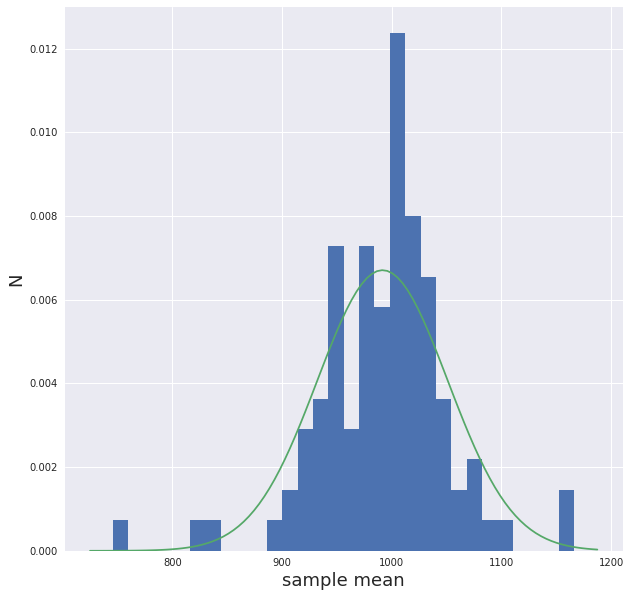

In [311]:
logmeans = list(md['lognormal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(logmeans,normed=True, bins=30)
#change into area = 1 as with a normal distribution by normed=True
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

#find mean and SD of my distribution
mean, SD = scipy.stats.norm.fit(logmeans)

#takes the limit of the x-axis of the plot
xmin, xmax = plt.xlim ()
x = np.linspace(xmin,xmax,100)

#takes the limit of the y-axis of the plot
y = scipy.stats.norm.pdf(x,mean,SD)

pl.plot(x,y)